In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

## 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. 
### Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [11]:
# Step 1: Load data from CSV files
customer_df = pd.read_csv("C:/Projects/Python_Case_Study1_Retail_CaseStudy/Customer.csv")
transaction_df = pd.read_csv("C:/Projects/Python_Case_Study1_Retail_CaseStudy/Transactions.csv")
product_hierarchy_df = pd.read_csv("C:/Projects/Python_Case_Study1_Retail_CaseStudy/prod_cat_info.csv")

# Step 2: Merge datasets into Customer_Final
customer_final_df = pd.merge(transaction_df, customer_df, left_on='cust_id', right_on='customer_Id', how='left')
customer_final_df = pd.merge(customer_final_df, product_hierarchy_df, on='prod_cat_code', how='left')

customer_final_df.to_csv("C:/Projects/Python_Case_Study1_Retail_CaseStudy/Customer_Final.csv", index=False)
print(customer_final_df)


       transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
0         80712190438   270351  28-02-2014                 1              1   
1         80712190438   270351  28-02-2014                 1              1   
2         80712190438   270351  28-02-2014                 1              1   
3         29258453508   270384  27-02-2014                 5              3   
4         29258453508   270384  27-02-2014                 5              3   
...               ...      ...         ...               ...            ...   
99288     77960931771   271961  25-01-2011                11              5   
99289     77960931771   271961  25-01-2011                11              5   
99290     77960931771   271961  25-01-2011                11              5   
99291     77960931771   271961  25-01-2011                11              5   
99292     77960931771   271961  25-01-2011                11              5   

       Qty  Rate      Tax  total_amt Store_type  cu

## 2. Prepare a summary report for the merged data set.
### a. Get the column names and their corresponding data types
### b. Top/Bottom 10 observations
### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
### d. Frequency tables for all the categorical variables

In [18]:
# Load the merged dataset
merged_data = pd.read_csv("C:/Projects/Python_Case_Study1_Retail_CaseStudy/Customer_Final.csv")

# a. Get the column names and their corresponding data types
column_data_types = merged_data.dtypes

print("a. Column Names and Data Types:")
print(column_data_types)
print("\n")


a. Column Names and Data Types:
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object




In [16]:
# b. Top/Bottom 10 observations
top_10_observations = merged_data.head(10)
bottom_10_observations = merged_data.tail(10)

print("b. Top 10 Observations:")
print(top_10_observations)
print("\n")
print("Bottom 10 Observations:")
print(bottom_10_observations)
print("\n")

b. Top 10 Observations:
   transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     80712190438   270351  28-02-2014                 1              1   -5   
2     80712190438   270351  28-02-2014                 1              1   -5   
3     29258453508   270384  27-02-2014                 5              3   -5   
4     29258453508   270384  27-02-2014                 5              3   -5   
5     29258453508   270384  27-02-2014                 5              3   -5   
6     29258453508   270384  27-02-2014                 5              3   -5   
7     29258453508   270384  27-02-2014                 5              3   -5   
8     51750724947   273420  24-02-2014                 6              5   -2   
9     51750724947   273420  24-02-2014                 6              5   -2   

   Rate      Tax  total_amt Store_type  customer_Id         DOB Gender  \
0  -772  405.300  -42

In [17]:
# c. “Five-number summary” for continuous variables (min, Q1, median, Q3, and max)
five_number_summary = merged_data.describe()

print("c. Five-number Summary for Continuous Variables:")
print(five_number_summary)
print("\n")


c. Five-number Summary for Continuous Variables:
       transaction_id        cust_id  prod_subcat_code  prod_cat_code  \
count    9.929300e+04   99293.000000      99293.000000   99293.000000   
mean     5.007320e+10  271030.010635          6.796894       4.003243   
std      2.899361e+10    2429.333624          3.609439       1.563991   
min      3.268991e+06  266783.000000          1.000000       1.000000   
25%      2.492150e+10  268956.000000          4.000000       3.000000   
50%      5.011083e+10  270982.000000          7.000000       5.000000   
75%      7.528121e+10  273120.000000         10.000000       5.000000   
max      9.998755e+10  275265.000000         12.000000       6.000000   

                Qty          Rate           Tax     total_amt    customer_Id  \
count  99293.000000  99293.000000  99293.000000  99293.000000   99293.000000   
mean       2.438017    637.919884    248.873736   2114.616420  271030.010635   
std        2.260726    621.576326    187.014422   250

In [20]:

# d. Frequency tables for all the categorical variables
frequency_tables = {}
categorical_columns = merged_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    frequency_tables[column] = merged_data[column].value_counts()

print("d. Frequency Tables for Categorical Variables:")
for column, freq_table in frequency_tables.items():
    print("Column:", column)
    print(freq_table)
    print("\n")


d. Frequency Tables for Categorical Variables:
Column: tran_date
tran_date
25-08-2012    153
13-07-2011    144
25-09-2011    144
3/2/2014      142
21-12-2013    141
             ... 
23-02-2014     11
24-02-2014     10
27-02-2014      5
21-02-2014      5
28-02-2014      3
Name: count, Length: 1129, dtype: int64


Column: Store_type
Store_type
e-Shop            40185
MBR               19974
Flagship store    19814
TeleShop          19320
Name: count, dtype: int64


Column: DOB
DOB
27-12-1988    156
17-09-1982    134
25-02-1974    126
18-11-1991    114
09-06-1970    107
             ... 
26-09-1983      2
09-05-1976      2
18-12-1973      2
26-02-1981      2
13-05-1981      2
Name: count, Length: 3987, dtype: int64


Column: Gender
Gender
M    51051
F    48202
Name: count, dtype: int64


Column: prod_cat
prod_cat
Books               36414
Electronics         24490
Home and kitchen    16516
Footwear             8997
Clothing             8880
Bags                 3996
Name: count, dtype: i

## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

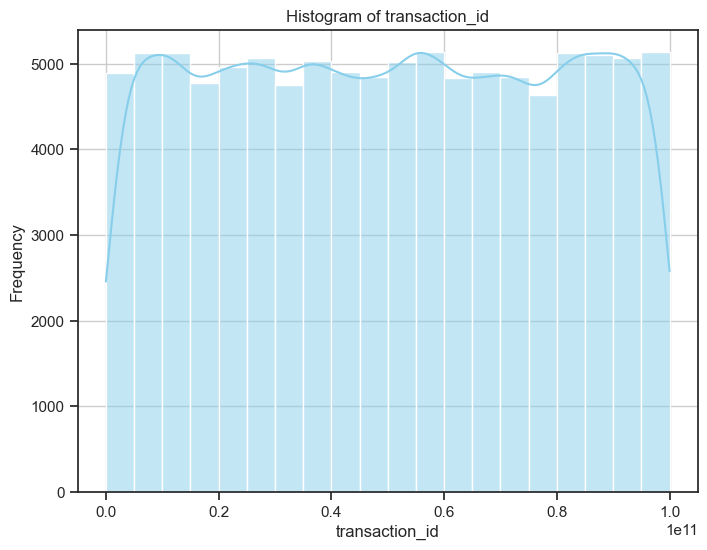

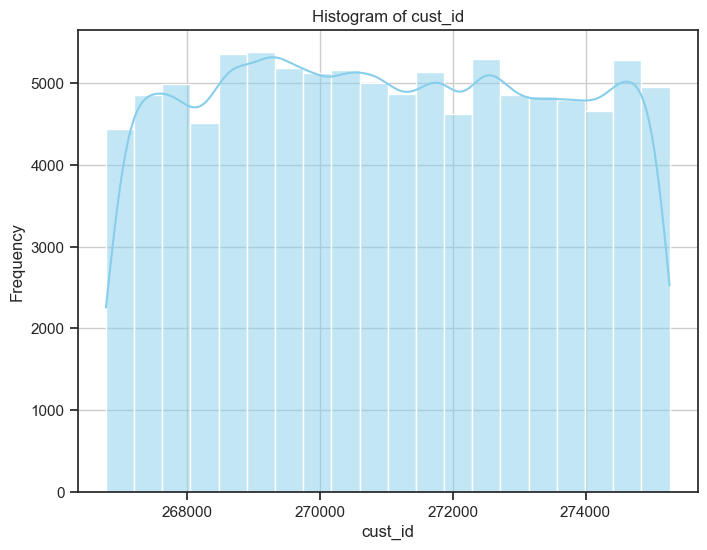

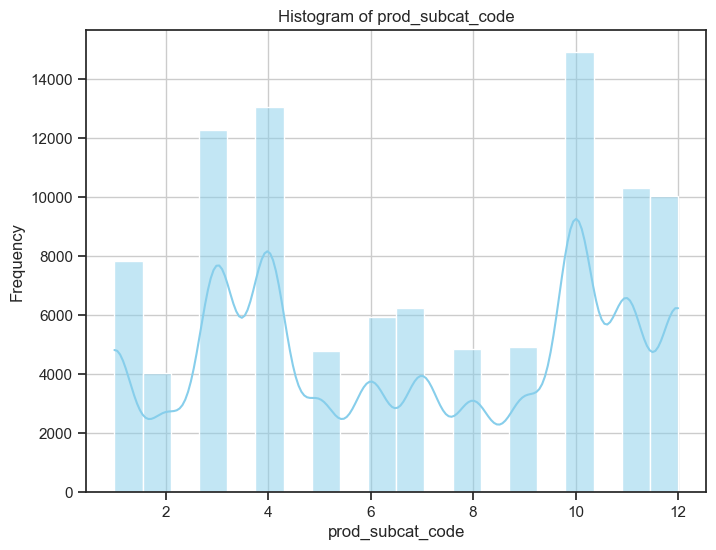

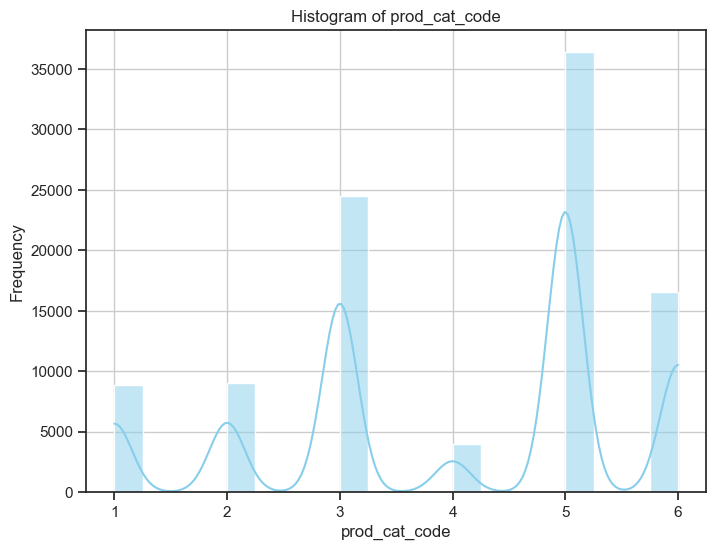

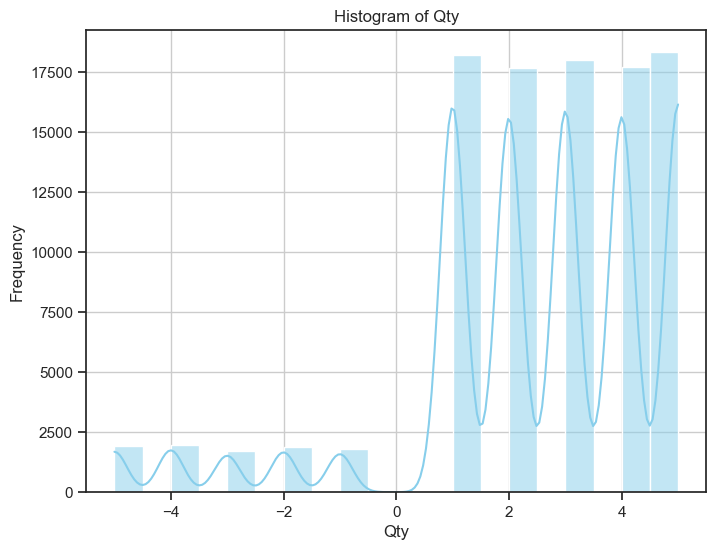

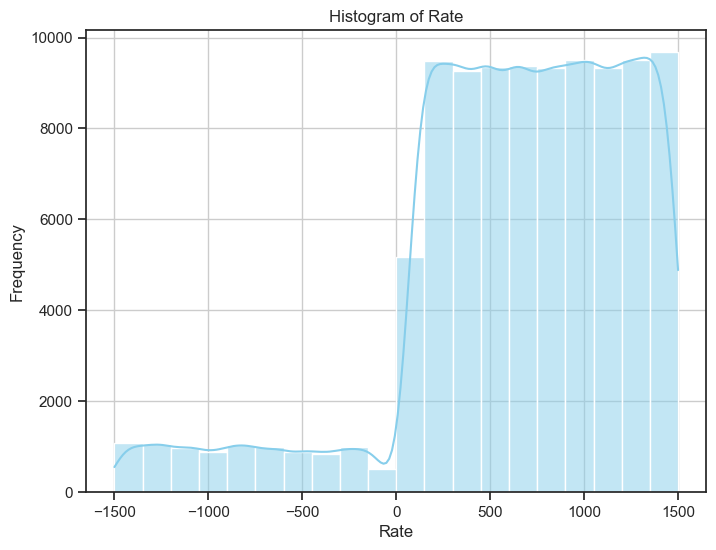

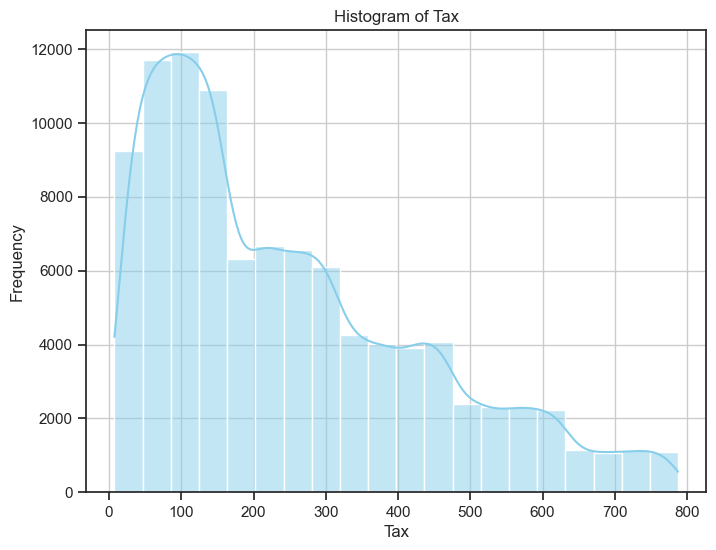

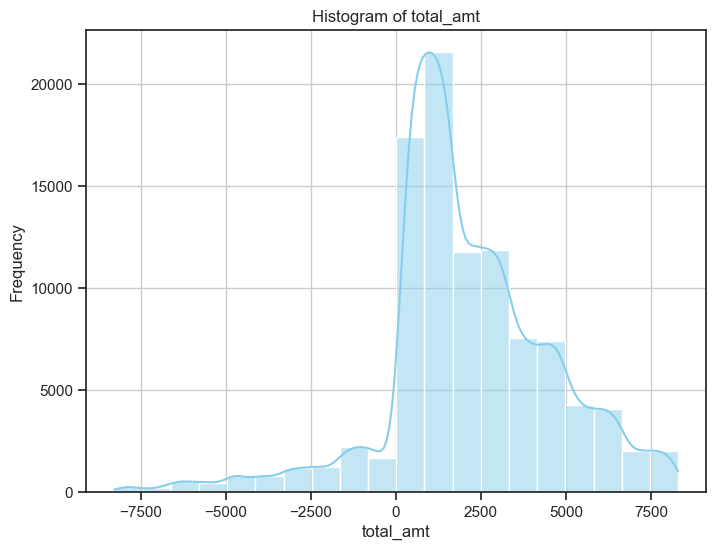

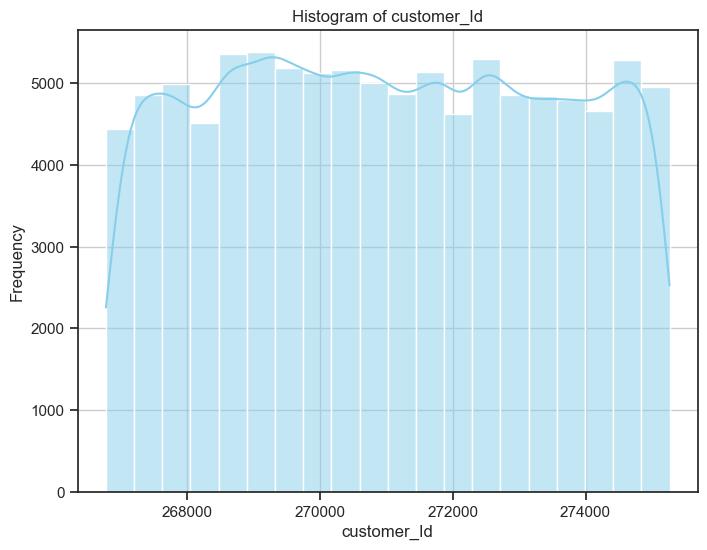

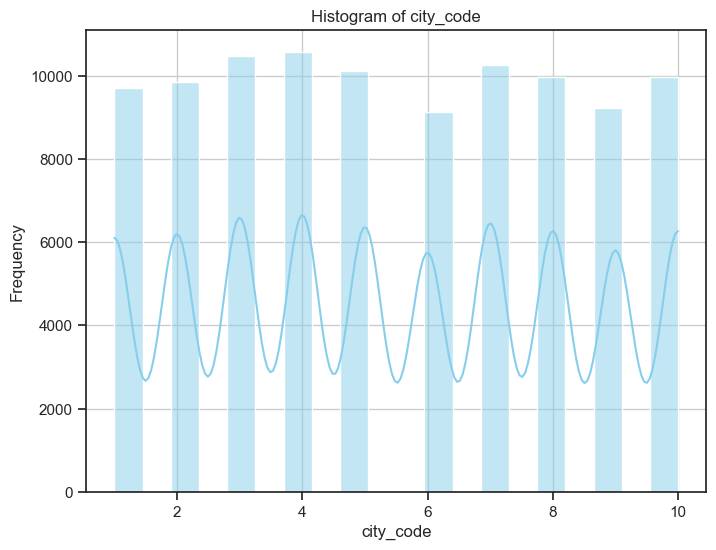

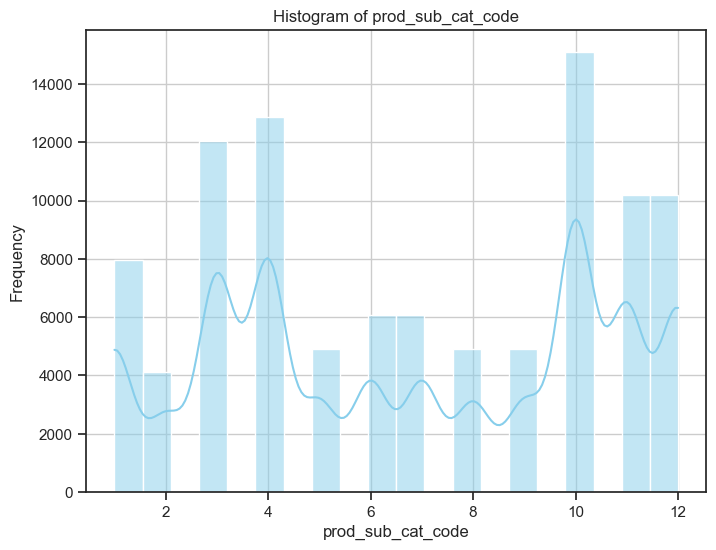

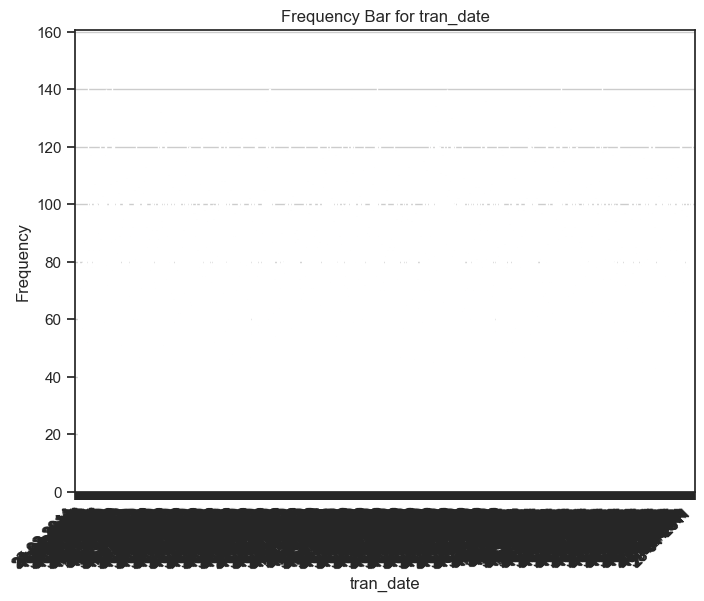

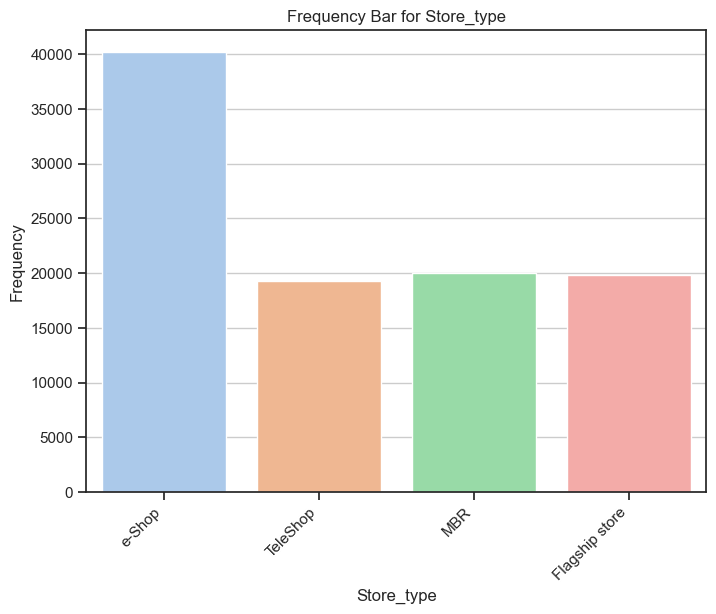

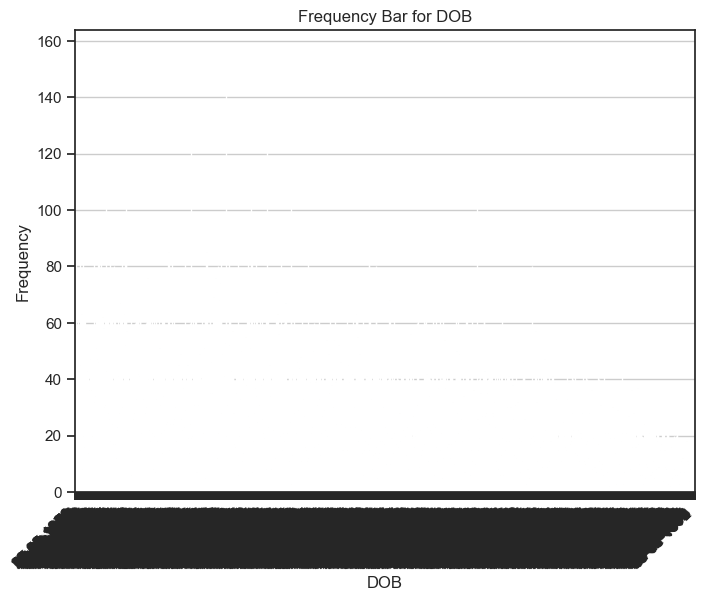

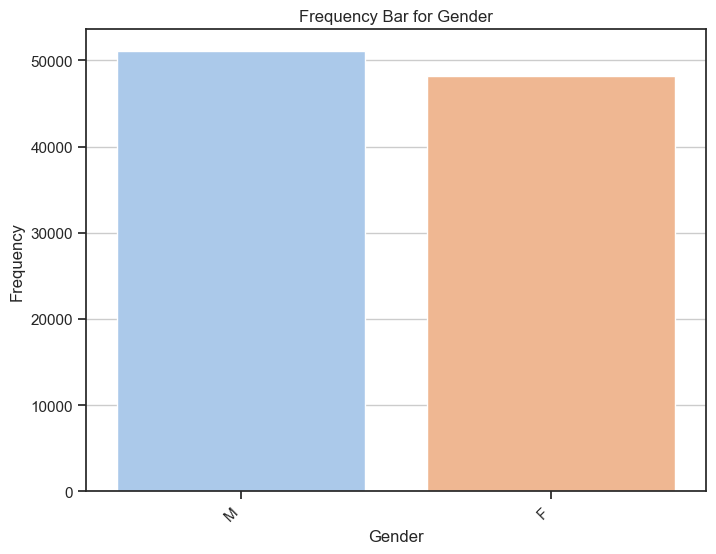

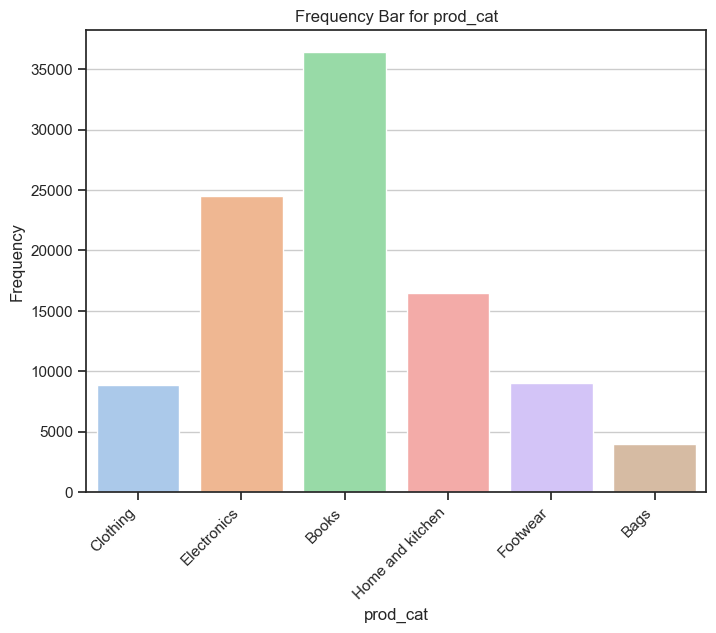

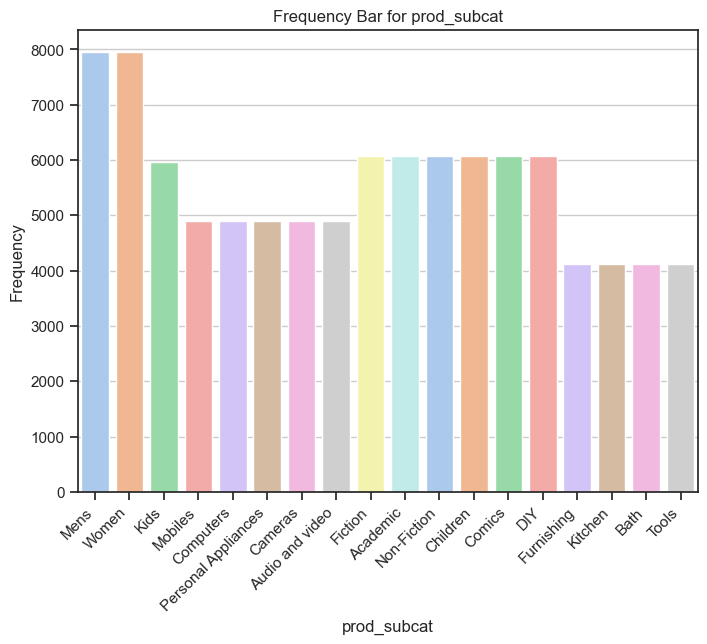

In [21]:
# Load the merged dataset
merged_data = pd.read_csv("C:/Projects/Python_Case_Study1_Retail_CaseStudy/Customer_Final.csv")

# Get continuous and categorical columns
continuous_columns = merged_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = merged_data.select_dtypes(include=['object']).columns

# Generate histograms for continuous variables
for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(merged_data[column], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Generate frequency bars for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=merged_data, x=column, palette='pastel')
    plt.title(f'Frequency Bar for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.show()


## 4. Calculate the following information using the merged dataset :
### a. Time period of the available transaction data
### b. Count of transactions where the total amount of transaction was negativ

In [26]:
# Load the merged dataset
merged_data = pd.read_csv("C:/Projects/Python_Case_Study1_Retail_CaseStudy/Customer_Final.csv")

# Convert the "tran_date" column to datetime format
merged_data['tran_date'] = pd.to_datetime(merged_data['tran_date'], format='mixed', dayfirst=True, errors='coerce')

# Drop rows with missing dates
merged_data.dropna(subset=['tran_date'], inplace=True)

# Calculate the time period of the available transaction data
start_date = merged_data['tran_date'].min()
end_date = merged_data['tran_date'].max()
time_period = end_date - start_date

print("a. Time period of the available transaction data:")
print("Start Date:", start_date)
print("End Date:", end_date)
print("Time Period:", time_period)
print("\n")

a. Time period of the available transaction data:
Start Date: 2011-01-25 00:00:00
End Date: 2014-02-28 00:00:00
Time Period: 1130 days 00:00:00




In [24]:

# b. Count the transactions where the total amount of the transaction was negative
negative_transactions_count = merged_data[merged_data['total_amt'] < 0]['transaction_id'].nunique()

print("b. Count of transactions where the total amount of transaction was negative:")
print("Number of Negative Transactions:", negative_transactions_count)

b. Count of transactions where the total amount of transaction was negative:
Number of Negative Transactions: 2059


## 5. Analyze which product categories are more popular among females vs male customers.


In [27]:
# Load the merged dataset
merged_data = pd.read_csv("C:/Projects/Python_Case_Study1_Retail_CaseStudy/Customer_Final.csv")

# Group the data by 'Gender' and 'prod_cat' and sum the 'total_amt' for each group
gender_category_spending = merged_data.groupby(['Gender', 'prod_cat'])['total_amt'].sum().reset_index()

# Separate the data for male and female customers
male_spending = gender_category_spending[gender_category_spending['Gender'] == 'M']
female_spending = gender_category_spending[gender_category_spending['Gender'] == 'F']

# Sort the data by total spending for each gender
male_spending = male_spending.sort_values(by='total_amt', ascending=False)
female_spending = female_spending.sort_values(by='total_amt', ascending=False)

# Display the top 5 product categories for male and female customers
print("Top 5 Product Categories for Male Customers:")
print(male_spending.head(5))
print("\n")
print("Top 5 Product Categories for Female Customers:")
print(female_spending.head(5))


Top 5 Product Categories for Male Customers:
   Gender          prod_cat     total_amt
7       M             Books  3.987584e+07
9       M       Electronics  2.851555e+07
11      M  Home and kitchen  1.720430e+07
8       M          Clothing  9.672238e+06
10      M          Footwear  9.044016e+06


Top 5 Product Categories for Female Customers:
  Gender          prod_cat     total_amt
1      F             Books  3.698815e+07
3      F       Electronics  2.509677e+07
5      F  Home and kitchen  1.652871e+07
4      F          Footwear  9.607659e+06
2      F          Clothing  9.080252e+06


## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [28]:
# Load the merged dataset
merged_data = pd.read_csv("C:/Projects/Python_Case_Study1_Retail_CaseStudy/Customer_Final.csv")

# Count the number of customers in each city code
customer_count_per_city = merged_data['city_code'].value_counts()

# Find the city code with the maximum customers
max_customers_city_code = customer_count_per_city.idxmax()
max_customers_count = customer_count_per_city.max()

# Calculate the percentage of customers from the city with the maximum customers
total_customers = len(merged_data)
percentage_customers_max_city = (max_customers_count / total_customers) * 100

print("City code with the maximum customers:", max_customers_city_code)
print("Number of customers from that city:", max_customers_count)
print("Percentage of customers from that city: {:.2f}%".format(percentage_customers_max_city))


City code with the maximum customers: 4.0
Number of customers from that city: 10571
Percentage of customers from that city: 10.65%


## 7. Which store type sells the maximum products by value and by quantity?

In [29]:
# Load the merged dataset
merged_data = pd.read_csv("C:/Projects/Python_Case_Study1_Retail_CaseStudy/Customer_Final.csv")

# Group the data by 'Store_type' and sum the 'total_amt' and 'Qty' for each store type
store_sales_by_value = merged_data.groupby('Store_type')['total_amt'].sum()
store_sales_by_quantity = merged_data.groupby('Store_type')['Qty'].sum()

# Find the store type with the maximum sales by value and by quantity
max_sales_value_store_type = store_sales_by_value.idxmax()
max_sales_quantity_store_type = store_sales_by_quantity.idxmax()

print("Store type that sells the maximum products by value:", max_sales_value_store_type)
print("Store type that sells the maximum products by quantity:", max_sales_quantity_store_type)


Store type that sells the maximum products by value: e-Shop
Store type that sells the maximum products by quantity: e-Shop


## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [30]:
# Load the merged dataset
merged_data = pd.read_csv("C:/Projects/Python_Case_Study1_Retail_CaseStudy/Customer_Final.csv")

# Filter the data for Flagship Stores and categories "Electronics" and "Clothing"
filtered_data = merged_data[(merged_data['Store_type'] == 'Flagship store') & 
                            (merged_data['prod_cat'].isin(['Electronics', 'Clothing']))]

# Calculate the total amount earned
total_amount_earned = filtered_data['total_amt'].sum()

print("Total amount earned from Electronics and Clothing categories from Flagship Stores:", total_amount_earned)


Total amount earned from Electronics and Clothing categories from Flagship Stores: 14658949.89


## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [32]:
# Load the merged dataset
merged_data = pd.read_csv("C:/Projects/Python_Case_Study1_Retail_CaseStudy/Customer_Final.csv")

# Filter the data for "Male" customers and the "Electronics" category
filtered_data = merged_data[(merged_data['Gender'] == 'M') & 
                            (merged_data['prod_cat'] == 'Electronics')]

# Calculate the total amount earned
total_amount_earned = filtered_data['total_amt'].sum()

print("Total amount earned from Male customers under the Electronics category:", total_amount_earned)


Total amount earned from Male customers under the Electronics category: 28515547.125


## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [33]:
# Load the merged dataset
merged_data = pd.read_csv("C:/Projects/Python_Case_Study1_Retail_CaseStudy/Customer_Final.csv")

# Remove transactions with negative amounts
positive_transactions = merged_data[merged_data['total_amt'] >= 0]

# Count the number of unique transactions for each customer
customer_transaction_count = positive_transactions.groupby('cust_id')['transaction_id'].nunique()

# Filter customers with more than 10 unique transactions
customers_with_more_than_10_transactions = customer_transaction_count[customer_transaction_count > 10]

# Count the number of customers with more than 10 unique transactions
num_customers_more_than_10_transactions = len(customers_with_more_than_10_transactions)

print("Number of customers with more than 10 unique transactions after removing negative transactions:", num_customers_more_than_10_transactions)


Number of customers with more than 10 unique transactions after removing negative transactions: 6


## 11. For all customers aged between 25 - 35, find out:
### a. What was the total amount spent for “Electronics” and “Books” product categories?
### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [34]:
# Load the merged dataset
merged_data = pd.read_csv("C:/Projects/Python_Case_Study1_Retail_CaseStudy/Customer_Final.csv")

# Convert 'DOB' to datetime format
merged_data['DOB'] = pd.to_datetime(merged_data['DOB'], format='%d-%m-%Y')

# Calculate age of customers
merged_data['age'] = pd.Timestamp.now().year - pd.DatetimeIndex(merged_data['DOB']).year

# Filter customers aged between 25 and 35
filtered_customers = merged_data[(merged_data['age'] >= 25) & (merged_data['age'] <= 35)]

# a. Total amount spent for "Electronics" and "Books" product categories
electronics_books_spending = filtered_customers[filtered_customers['prod_cat'].isin(['Electronics', 'Books'])]
total_amount_electronics_books = electronics_books_spending['total_amt'].sum()

# b. Total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014
filtered_date_range = filtered_customers[(filtered_customers['tran_date'] >= '2014-01-01') & (filtered_customers['tran_date'] <= '2014-03-01')]
total_amount_jan_to_mar = filtered_date_range['total_amt'].sum()

print("a. Total amount spent for 'Electronics' and 'Books' product categories by customers aged between 25 and 35:", total_amount_electronics_books)
print("b. Total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014:", total_amount_jan_to_mar)


a. Total amount spent for 'Electronics' and 'Books' product categories by customers aged between 25 and 35: 21751521.674999997
b. Total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014: 0.0
